In [109]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
#SGD CLASSIFIER
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import  precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import seaborn as sns # plotting
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('dataset.csv')
data = dataset.values

x = data[:, :1]
y = data[:, 1:2]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)
print(y)

Dimensionalitat de la BBDD: (22000, 2)
Dimensionalitat de les entrades X (22000, 1)
Dimensionalitat de l'atribut Y (22000, 1)
[['Estonian']
 ['Swedish']
 ['Thai']
 ...
 ['Spanish']
 ['Chinese']
 ['Romanian']]


In [110]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Text        0
language    0
dtype: int64


In [111]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [112]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Hindi
freq,48,1000


In [113]:
dataset.applymap(str.lower)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,estonian
1,sebes joseph pereira thomas på eng the jesuit...,swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,tamil
4,de spons behoort tot het geslacht haliclona en...,dutch
...,...,...
21995,hors du terrain les années et sont des année...,french
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,thai
21997,con motivo de la celebración del septuagésimoq...,spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,chinese


In [114]:
dataset.language.unique()


array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [115]:
dataset.Text[0]

'klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'

<IPython.core.display.Javascript object>


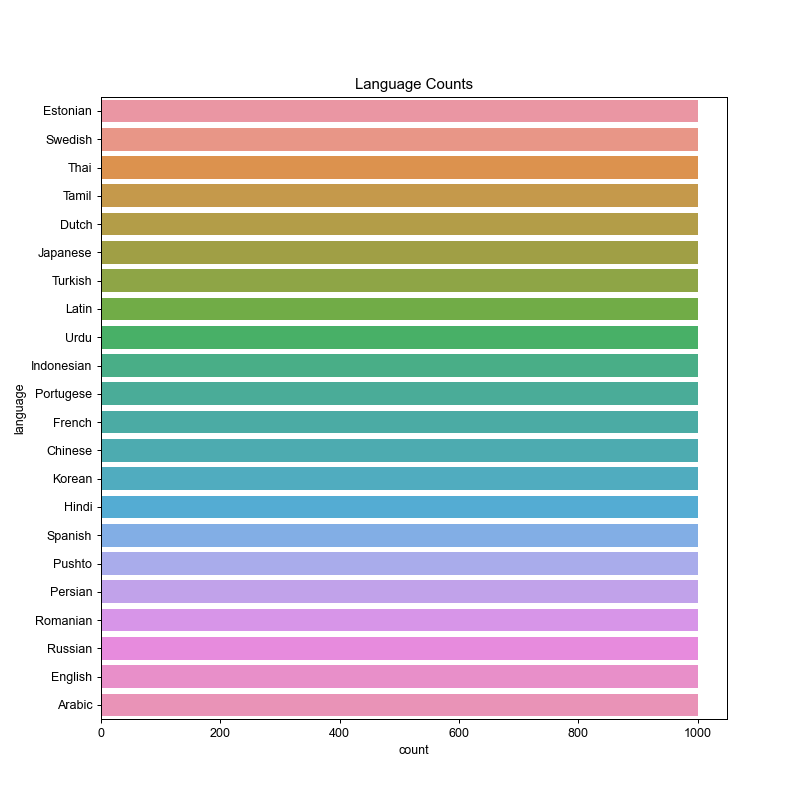

In [116]:
plt.figure(figsize=(10,10))
plt.title('Language Counts')
ax = sns.countplot(y=dataset['language'], data=dataset)
plt.show()

In [117]:
count_vect = CountVectorizer(analyzer='word')
X_train_counts = count_vect.fit_transform(dataset.Text)
X_train_counts.shape

(22000, 277720)

In [118]:
print(count_vect.vocabulary_.get(u'metro'))

69706


In [119]:
print(X_train_counts[0])

  (0, 57772)	1
  (0, 43363)	1
  (0, 104967)	3
  (0, 80287)	1
  (0, 75304)	2
  (0, 80056)	1
  (0, 67653)	1
  (0, 77619)	1
  (0, 2193)	1
  (0, 63122)	1
  (0, 47020)	1
  (0, 53103)	2
  (0, 79323)	1
  (0, 80288)	1
  (0, 45293)	1
  (0, 49445)	1
  (0, 60954)	1
  (0, 112024)	1
  (0, 136)	1
  (0, 117124)	1
  (0, 106285)	1
  (0, 67654)	1
  (0, 122429)	1
  (0, 59244)	1
  (0, 122097)	1
  (0, 63450)	2
  (0, 55264)	2
  (0, 153)	2
  (0, 75247)	2
  (0, 43364)	1
  (0, 113245)	1
  (0, 45787)	1
  (0, 76696)	1
  (0, 122098)	1
  (0, 43365)	1


In [120]:
count_vect.get_feature_names()

['aa',
 'aaa',
 'aabdel',
 'aac',
 'aadlikeks',
 'aadlimarssal',
 'aadlimatriklisse',
 'aadliseisuse',
 'aadliseisusesse',
 'aadlisoost',
 'aadlitiitli',
 'aadressil',
 'aaea',
 'aafrika',
 'aafrikas',
 'aafrikast',
 'aakrit',
 'aala',
 'aalborg',
 'aam',
 'aamer',
 'aan',
 'aanbiedingen',
 'aanbiedt',
 'aanblijven',
 'aand',
 'aandacht',
 'aandeel',
 'aandelen',
 'aandrijflijn',
 'aandrijft',
 'aanduiding',
 'aangebracht',
 'aangedreven',
 'aangeduid',
 'aangeeft',
 'aangehecht',
 'aangehouden',
 'aangekomen',
 'aangekondigd',
 'aangelegd',
 'aangenomen',
 'aangepast',
 'aangeraden',
 'aangeroepen',
 'aangeschaft',
 'aangesloten',
 'aangesteld',
 'aangestoken',
 'aangetoond',
 'aangevallen',
 'aangeven',
 'aangevochten',
 'aangevuld',
 'aangewezen',
 'aangezien',
 'aangrenzende',
 'aanhangers',
 'aanhangsels',
 'aanklacht',
 'aankomsttijd',
 'aankoop',
 'aankwam',
 'aanleert',
 'aanleg',
 'aanleggen',
 'aanleiding',
 'aanloop',
 'aanmaken',
 'aanmeldde',
 'aannamen',
 'aanpassen',
 'a

In [121]:

x_train, x_test, y_train, y_test = train_test_split(X_train_counts, dataset.language, test_size = 0.30)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(dataset.Text, dataset.language, test_size = 0.30)

In [123]:
count_vect = CountVectorizer(analyzer='word')
x_train = count_vect.fit_transform(x_train)
x_test=count_vect.transform(x_test)

In [124]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [125]:
y_pred = model.predict(x_test)

In [126]:

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)
plot_F_Scores(y_test, y_pred)


Accuracy is : 0.9357575757575758
F1: 0.9357575757575758 (micro), 0.93384240323739 (macro), 0.9351629703125093 (weighted)


<IPython.core.display.Javascript object>


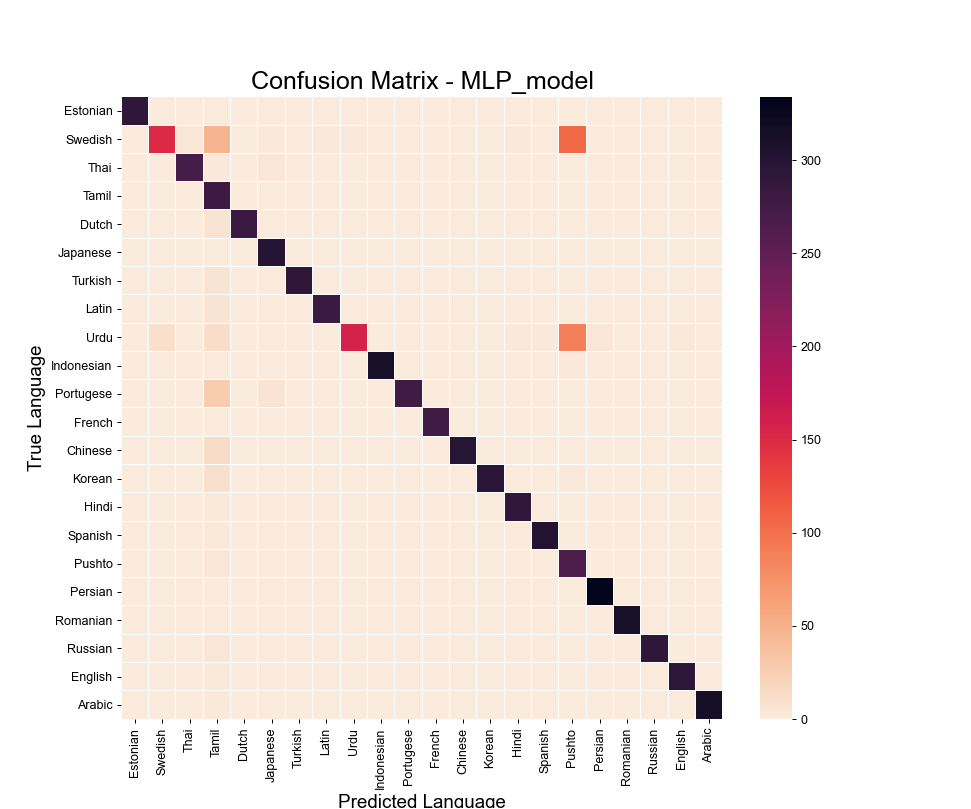

<ipython-input-127-8073fca6d86e>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Confusion Matrix - MLP_model', Fontsize=20)


In [127]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - MLP_model', Fontsize=20)
sns.heatmap(cm, xticklabels=dataset.language.unique(), yticklabels=dataset.language.unique(), cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [194]:

model1=SGDClassifier(loss='hinge', penalty='l2',alpha=0.001, random_state=42,max_iter=1000, tol=None)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
ac = accuracy_score(y_test, y_pred1)
print("Accuracy is :",ac)

Accuracy is : 0.9628787878787879


In [195]:
plot_F_Scores(y_test, y_pred1)

F1: 0.9628787878787879 (micro), 0.9629080580870493 (macro), 0.9632745355395853 (weighted)


In [196]:
filename="SGD.pkl"
variable=['habia una vez un patito chiquitito']
with open(filename, 'wb') as fout:
    pickle.dump((count_vect, model1), fout)

with open(filename, 'rb') as f:
    count_vector, clfier = pickle.load(f)

variable=count_vector.transform(variable)
prediction=clfier.predict(variable)
prediction

array(['Japanese'], dtype='<U10')

<IPython.core.display.Javascript object>


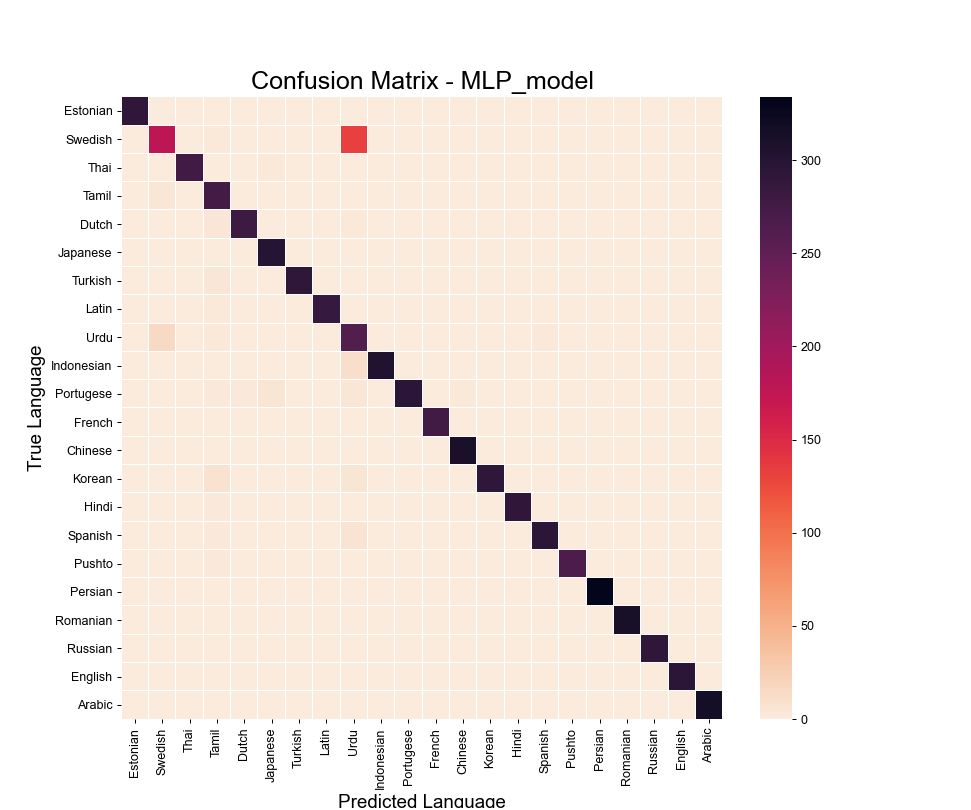

<ipython-input-130-569b855658dc>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Confusion Matrix - MLP_model', Fontsize=20)


In [130]:
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - MLP_model', Fontsize=20)
sns.heatmap(cm, xticklabels=dataset.language.unique(), yticklabels=dataset.language.unique(), cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [131]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=1000)
# L'entrenem 
tree.fit(x_train,y_train)

prdiction=tree.predict(x_test)
print ("Decision tree criterio gini ", tree.score(x_test,y_test))

Decision tree criterio gini  0.8904545454545455


In [132]:
tree2 = DecisionTreeClassifier(criterion='entropy',max_depth=1000)
# L'entrenem 
tree2.fit(x_train,y_train)

prdiction=tree2.predict(x_test)
print ("Decision tree criterio entropy ", tree2.score(x_test,y_test))

Decision tree criterio entropy  0.8842424242424243


In [133]:
plot_F_Scores(y_test, prdiction)

F1: 0.8842424242424243 (micro), 0.8872715082846799 (macro), 0.8887397606345198 (weighted)


In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(22)
#L'entrenem 
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print ("KNN ", knn.score(x_test,y_test))

KNN  0.47893939393939394


In [135]:
plot_F_Scores(y_test, prediction)

F1: 0.47893939393939394 (micro), 0.5433009939762542 (macro), 0.5421626304283619 (weighted)


<IPython.core.display.Javascript object>


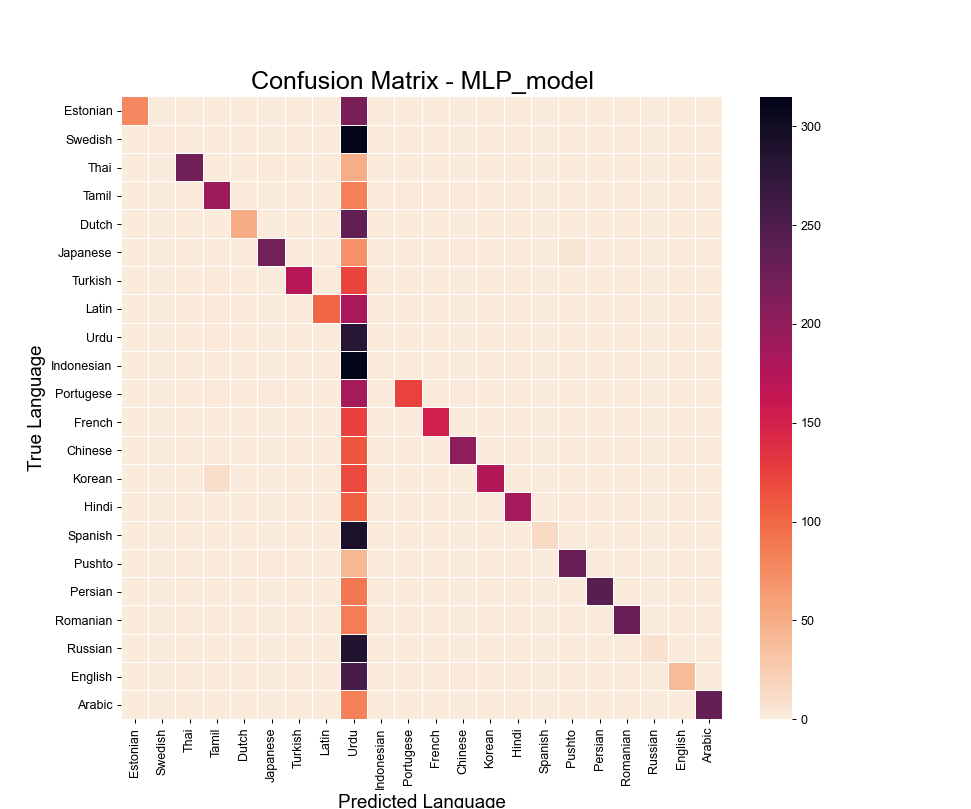

<ipython-input-136-016f379ecf17>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Confusion Matrix - MLP_model', Fontsize=20)


In [136]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - MLP_model', Fontsize=20)
sns.heatmap(cm, xticklabels=dataset.language.unique(), yticklabels=dataset.language.unique(), cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [137]:
svc = svm.SVC(C=20.0, kernel='poly', gamma=0.9, probability=True)
svc.fit(x_train, y_train)
SVCprobs = svc.predict_proba(x_test)
print ("Correct classification polynomial  with kernel 20  ", 80, "% of the data: ", svc.score(x_test, y_test))


Correct classification polynomial  with kernel 20   80 % of the data:  0.6010606060606061


In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=1000, random_state=0)
clf.fit(x_train, y_train)

Random_forest=clf.predict(x_test)

In [139]:
plot_F_Scores(y_test, Random_forest)

F1: 0.9501515151515152 (micro), 0.9493148043871652 (macro), 0.9497656790525417 (weighted)


array(['Spanish'], dtype=object)

In [140]:
svc2 = svm.SVC(C=200.0, kernel='rbf', gamma=0.9, probability=True)
svc2.fit(x_train, y_train)
SVCprobs2 = svc2.predict_proba(x_test)
print ("Correct classification polynomial  with kernel 20  ", 80, "% of the data: ", svc2.score(x_test, y_test))

Correct classification polynomial  with kernel 20   80 % of the data:  0.07075757575757576


In [141]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((15400, 217295), (6600, 217295), (15400,), (6600,))

In [142]:
INPUT_SIZE = x_train.shape[1]
OUTPUT_SIZE = len(dataset['language'].unique())
EPOCHS = 10
BATCH_SIZE = 128
INPUT_SIZE,OUTPUT_SIZE,EPOCHS,BATCH_SIZE

(217295, 22, 10, 128)

In [184]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=0.001,
                    hidden_layer_sizes=(10,), random_state=1,warm_start=True)

clf.fit(x_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(10,), random_state=1,
              warm_start=True)

In [144]:
var=clf.predict(x_test)

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, var)
print("Accuracy is :",ac)
plot_F_Scores(y_test, var)

Accuracy is : 0.965
F1: 0.965 (micro), 0.9645213009660248 (macro), 0.9647971760819093 (weighted)


In [157]:
import pickle


<IPython.core.display.Javascript object>


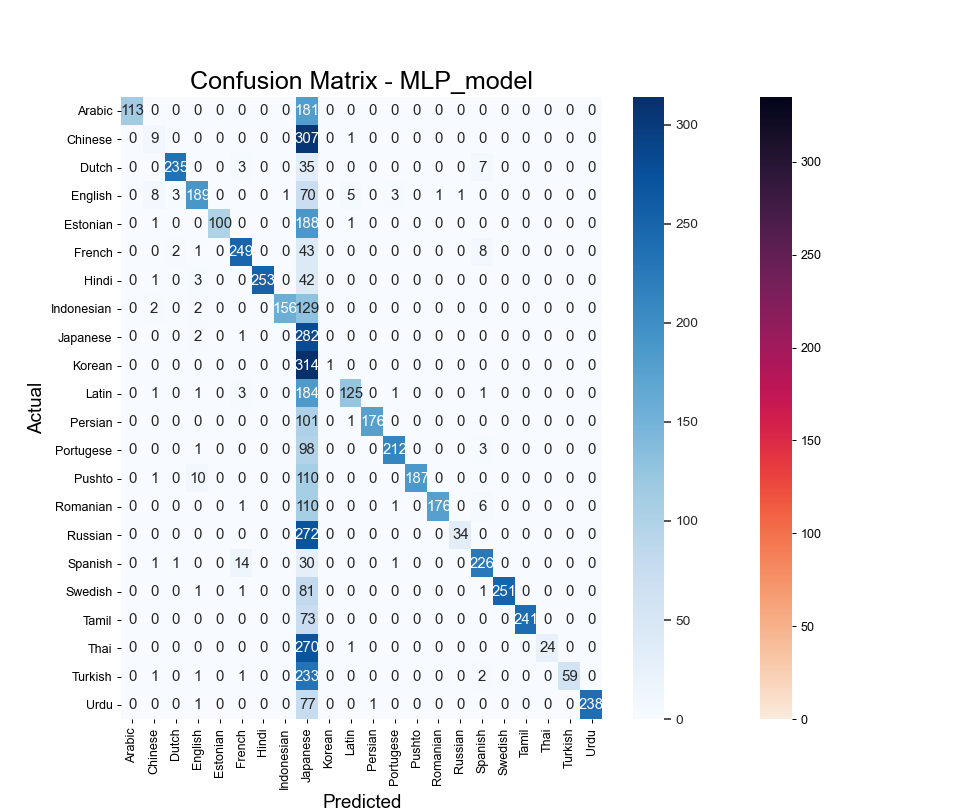

<ipython-input-146-55ce31e74f40>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Confusion Matrix - MLP_model', Fontsize=20)


In [146]:
cm = confusion_matrix(y_test, var)

plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - MLP_model', Fontsize=20)
sns.heatmap(cm, xticklabels=dataset.language.unique(), yticklabels=dataset.language.unique(), cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [147]:
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
def toNumpyArray(data):
    data_type = type(data)
    if data_type == np.ndarray:
        return data
    elif data_type == list:
        return np.array(data_type)
    elif data_type == scipy.sparse.csr.csr_matrix:
        return data.toarray()
    print(data_type)
    return None
def plot_F_Scores(y_test, y_predict):
    f1_micro = f1_score(y_test, y_predict, average='micro')
    f1_macro = f1_score(y_test, y_predict, average='macro')
    f1_weighted = f1_score(y_test, y_predict, average='weighted')
    print("F1: {} (micro), {} (macro), {} (weighted)".format(f1_micro, f1_macro, f1_weighted))
    
def applyNearestNeighbour(X_train, y_train, X_test):
    #trainArray = toNumpyArray(X_train)
    #estArray = toNumpyArray(X_test)
    
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(x_test)
    return y_predict

def plot_Confusion_Matrix(y_test, y_predict, color="Blues"):
    allLabels = list(set(list(y_test) + list(y_predict)))
    allLabels.sort()
    confusionMatrix = confusion_matrix(y_test, y_predict, labels=allLabels)
    unqiueLabel = np.unique(allLabels)
    df_cm = pd.DataFrame(confusionMatrix, columns=unqiueLabel, index=unqiueLabel)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    sns.set(font_scale=0.8) # for label size
    sns.set(rc={'figure.figsize':(15, 15)})
    sns.heatmap(df_cm, cmap=color, annot=True, annot_kws={"size": 12}, fmt='g')# font size
    plt.show()


## Unigrams
#y_predict_knn_unigram = applyNearestNeighbour(X_unigram_train, y_train, X_unigram_test)
#plot_F_Scores(y_test, y_predict_knn_unigram)
#plot_Confusion_Matrix(y_test, y_predict_knn_unigram, "Purples")

# Top 50
y_predict = applyNearestNeighbour(x_train, y_train, x_test)
plot_F_Scores(y_test, y_predict)
plot_Confusion_Matrix(y_test, y_predict, "Blues")

F1: 0.5357575757575758 (micro), 0.5994569533628653 (macro), 0.5978048444758238 (weighted)


In [148]:
#No se pouede hacer primero un train test split y luego un count vectorizer, porque se crean dos matrizes sparse con
#dimensiones diferentes lo cual hace que a la hora de realizar la porediccion de error por diferenete lopngitud de matriz

In [149]:
x_train, x_test, y_train, y_test = train_test_split(dataset.Text, dataset.language, test_size = 0.30)

In [150]:
count_vect = CountVectorizer(analyzer='word')
x_train = count_vect.fit_transform(x_train)
x_test=count_vect.transform(x_test)

In [185]:
variable=['habia una vez un patito chiquitito']

In [170]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
prediction=model.predict(x_test)
print ("KNN ", model.score(x_test,y_test))

KNN  0.9465151515151515


In [171]:
variable=count_vect.transform(variable)
prediction=model.predict(variable)

In [154]:
print(prediction)

['Spanish']


In [186]:
import pickle
filename="MLP.pkl"
with open(filename, 'wb') as fout:
    pickle.dump((count_vect, clf), fout)

In [187]:
filename="MLP.pkl"


array(['Spanish'], dtype='<U10')